# Transfer Learning InceptionV3 using Keras

# 

In [5]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

## import the libraries as shown below

In [18]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob


In [19]:
# re-sizing all the images 
IMAGE_SIZE = [224, 224]

train_path = 'tomato/Training'
valid_path = 'tomato/Test'

In [20]:
# Importing the inceptionV3 library and adding preprocessing layer 

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [21]:
for layer in inception.layers:
    layer.trainable = False

In [31]:
folders = glob('tomato/Test/*')

In [32]:
#Flattening the layer
x = Flatten()(inception.output)

## Model Building

In [33]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [34]:
# structure of the model
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_188 (Conv2D)            (None, 111, 111, 32  864         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_188 (Batch  (None, 111, 111, 32  96         ['conv2d_188[0][0]']             
 Normalization)                 )                                                           

 batch_normalization_193 (Batch  (None, 25, 25, 64)  192         ['conv2d_193[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_195 (Batch  (None, 25, 25, 64)  192         ['conv2d_195[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_198 (Batch  (None, 25, 25, 96)  288         ['conv2d_198[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_199 (Batch  (None, 25, 25, 32)  96          ['conv2d_199[0][0]']             
 Normaliza

                                                                                                  
 batch_normalization_210 (Batch  (None, 25, 25, 64)  192         ['conv2d_210[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_210 (Activation)    (None, 25, 25, 64)   0           ['batch_normalization_210[0][0]']
                                                                                                  
 conv2d_208 (Conv2D)            (None, 25, 25, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_211 (Conv2D)            (None, 25, 25, 96)   55296       ['activation_210[0][0]']         
                                                                                                  
 batch_nor

                                                                                                  
 max_pooling2d_10 (MaxPooling2D  (None, 12, 12, 288)  0          ['mixed2[0][0]']                 
 )                                                                                                
                                                                                                  
 mixed3 (Concatenate)           (None, 12, 12, 768)  0           ['activation_214[0][0]',         
                                                                  'activation_217[0][0]',         
                                                                  'max_pooling2d_10[0][0]']       
                                                                                                  
 conv2d_222 (Conv2D)            (None, 12, 12, 128)  98304       ['mixed3[0][0]']                 
                                                                                                  
 batch_nor

                                                                  'activation_226[0][0]',         
                                                                  'activation_227[0][0]']         
                                                                                                  
 conv2d_232 (Conv2D)            (None, 12, 12, 160)  122880      ['mixed4[0][0]']                 
                                                                                                  
 batch_normalization_232 (Batch  (None, 12, 12, 160)  480        ['conv2d_232[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_232 (Activation)    (None, 12, 12, 160)  0           ['batch_normalization_232[0][0]']
                                                                                                  
 conv2d_23

 batch_normalization_242 (Batch  (None, 12, 12, 160)  480        ['conv2d_242[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_242 (Activation)    (None, 12, 12, 160)  0           ['batch_normalization_242[0][0]']
                                                                                                  
 conv2d_243 (Conv2D)            (None, 12, 12, 160)  179200      ['activation_242[0][0]']         
                                                                                                  
 batch_normalization_243 (Batch  (None, 12, 12, 160)  480        ['conv2d_243[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activatio

 conv2d_253 (Conv2D)            (None, 12, 12, 192)  258048      ['activation_252[0][0]']         
                                                                                                  
 batch_normalization_253 (Batch  (None, 12, 12, 192)  576        ['conv2d_253[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_253 (Activation)    (None, 12, 12, 192)  0           ['batch_normalization_253[0][0]']
                                                                                                  
 conv2d_249 (Conv2D)            (None, 12, 12, 192)  147456      ['mixed6[0][0]']                 
                                                                                                  
 conv2d_254 (Conv2D)            (None, 12, 12, 192)  258048      ['activation_253[0][0]']         
          

 activation_261 (Activation)    (None, 12, 12, 192)  0           ['batch_normalization_261[0][0]']
                                                                                                  
 conv2d_258 (Conv2D)            (None, 12, 12, 192)  147456      ['mixed7[0][0]']                 
                                                                                                  
 conv2d_262 (Conv2D)            (None, 12, 12, 192)  258048      ['activation_261[0][0]']         
                                                                                                  
 batch_normalization_258 (Batch  (None, 12, 12, 192)  576        ['conv2d_258[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_262 (Batch  (None, 12, 12, 192)  576        ['conv2d_262[0][0]']             
 Normaliza

 conv2d_272 (Conv2D)            (None, 5, 5, 192)    245760      ['average_pooling2d_25[0][0]']   
                                                                                                  
 batch_normalization_264 (Batch  (None, 5, 5, 320)   960         ['conv2d_264[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_266 (Activation)    (None, 5, 5, 384)    0           ['batch_normalization_266[0][0]']
                                                                                                  
 activation_267 (Activation)    (None, 5, 5, 384)    0           ['batch_normalization_267[0][0]']
                                                                                                  
 activation_270 (Activation)    (None, 5, 5, 384)    0           ['batch_normalization_270[0][0]']
          

                                                                                                  
 activation_276 (Activation)    (None, 5, 5, 384)    0           ['batch_normalization_276[0][0]']
                                                                                                  
 activation_279 (Activation)    (None, 5, 5, 384)    0           ['batch_normalization_279[0][0]']
                                                                                                  
 activation_280 (Activation)    (None, 5, 5, 384)    0           ['batch_normalization_280[0][0]']
                                                                                                  
 batch_normalization_281 (Batch  (None, 5, 5, 192)   576         ['conv2d_281[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activatio

In [35]:
# cost and optimization method to used
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

## Data Augmentation using ImageDataGenerator

In [36]:
# Using the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [37]:
training_set = train_datagen.flow_from_directory('tomato/Training',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1807 images belonging to 2 classes.


In [38]:
test_set = test_datagen.flow_from_directory('tomato/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 784 images belonging to 2 classes.


## Fitting Model

In [39]:
# fitting the model
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/20
57/57 [==============================] - 96s 2s/step - loss: 0.4800 - accuracy: 0.9214 - val_loss: 0.1888 - val_accuracy: 0.9617
Epoch 2/20
57/57 [==============================] - 100s 2s/step - loss: 0.3123 - accuracy: 0.9557 - val_loss: 0.9382 - val_accuracy: 0.8852
Epoch 3/20
57/57 [==============================] - 102s 2s/step - loss: 0.1894 - accuracy: 0.9768 - val_loss: 0.1609 - val_accuracy: 0.9809
Epoch 4/20
57/57 [==============================] - 103s 2s/step - loss: 0.1357 - accuracy: 0.9768 - val_loss: 0.2136 - val_accuracy: 0.9681
Epoch 5/20
57/57 [==============================] - 111s 2s/step - loss: 0.0540 - accuracy: 0.9867 - val_loss: 0.1935 - val_accuracy: 0.9809
Epoch 6/20
57/57 [==============================] - 121s 2s/step - loss: 0.1488 - accuracy: 0.9840 - val_loss: 0.1499 - val_accuracy: 0.9809
Epoch 7/20
57/57 [==============================] - 122s 2s/step - loss: 0.0779 - accuracy: 0.9878 - val_loss: 0.1752 - val_accuracy: 0.9834
Epoch 8/20
57/

In [71]:
scores = model.evaluate(test_set)

25/25 [==============================] - 27s 1s/step - loss: 0.2518 - accuracy: 0.9821


## Plotting the accuracy and loss factors

In [72]:
import matplotlib.pyplot as plt

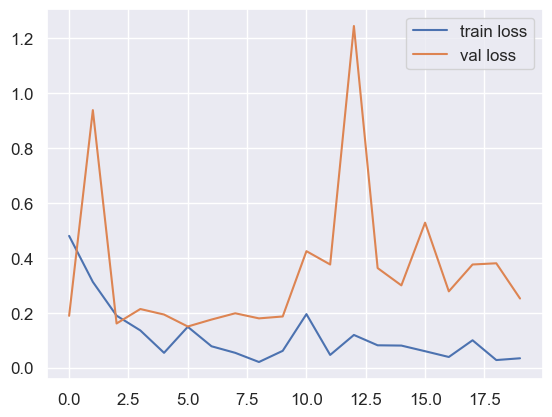

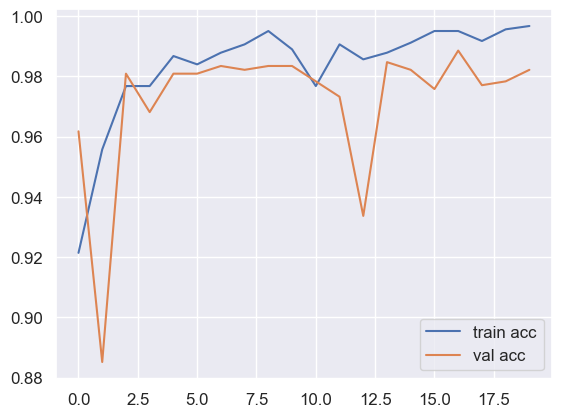

<Figure size 640x480 with 0 Axes>

In [73]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

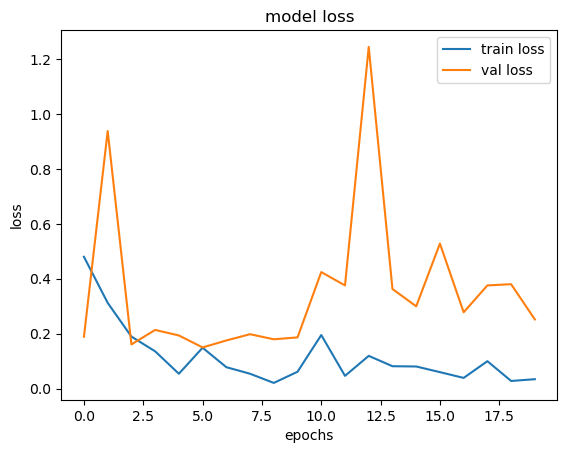

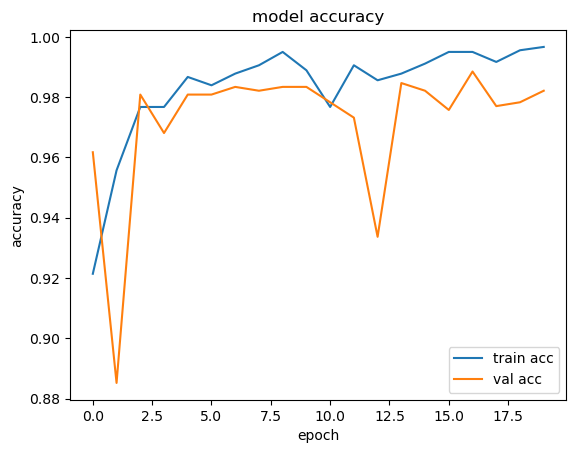

<Figure size 640x480 with 0 Axes>

In [43]:
# ploting the loss
plt.title('model loss')
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.ylabel('loss')
plt.xlabel('epochs')
plt.show()
plt.savefig('LossVal_loss')

# ploting the accuracy
plt.title('model accuracy')
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()
plt.savefig('AccVal_acc')

## saving the model as a h5 file

In [45]:
# saving it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_inceptionV3.h5')

In [46]:
y_pred = model.predict(test_set)

25/25 [==============================] - 27s 1s/step


In [47]:
y_pred

array([[1.0000000e+00, 0.0000000e+00],
       [1.0523539e-22, 1.0000000e+00],
       [6.7085417e-37, 1.0000000e+00],
       ...,
       [7.1355863e-32, 1.0000000e+00],
       [1.0000000e+00, 0.0000000e+00],
       [1.0821637e-26, 1.0000000e+00]], dtype=float32)

## Print validation confusion matrix


In [48]:
test_labels = test_set.classes

In [49]:
from sklearn.metrics import confusion_matrix

In [50]:
conf_matrix=confusion_matrix(test_labels, y_pred.argmax(axis=1))

[Text(0, 0.5, 'Early_bright'), Text(0, 1.5, 'Healthy')]

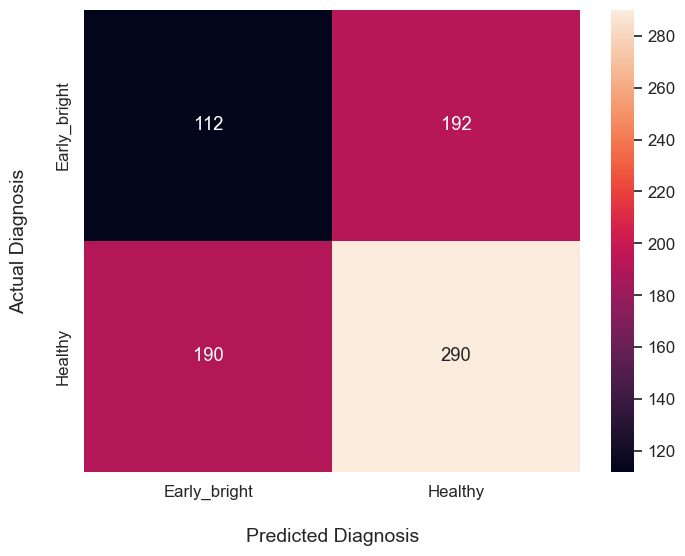

In [51]:
import seaborn as sns
plt.figure(figsize=(8,6), dpi=100)
sns.set(font_scale = 1.1)
ax = sns.heatmap(conf_matrix, annot=True, fmt='d', )
# set x-axis label and ticks. 
ax.set_xlabel("Predicted Diagnosis", fontsize=14, labelpad=20)
ax.xaxis.set_ticklabels(['Early_bright', 'Healthy'])
# set y-axis label and ticks
ax.set_ylabel("Actual Diagnosis", fontsize=14, labelpad=20)
ax.yaxis.set_ticklabels(['Early_bright', 'Healthy'])

In [52]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [53]:
y_pred

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,

## Loading model

In [54]:

 
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [55]:
model=load_model('model_inceptionV3.h5')

## Run prediction on a sample image

In [56]:
img=image.load_img('tomato/Test/Tomato_Early_blight/e2.JPG',target_size=(224,224))

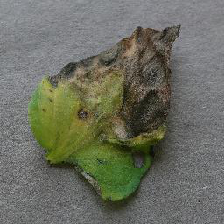

In [57]:
img

In [60]:
x=image.img_to_array(img)
x

array([[[139., 143., 146.],
        [146., 150., 153.],
        [150., 154., 157.],
        ...,
        [127., 126., 131.],
        [133., 132., 137.],
        [139., 138., 143.]],

       [[145., 149., 152.],
        [151., 155., 158.],
        [155., 159., 162.],
        ...,
        [134., 133., 138.],
        [136., 135., 140.],
        [139., 138., 143.]],

       [[136., 140., 143.],
        [141., 145., 148.],
        [144., 148., 151.],
        ...,
        [142., 141., 146.],
        [139., 138., 143.],
        [138., 137., 142.]],

       ...,

       [[ 96.,  96.,  96.],
        [ 93.,  93.,  93.],
        [101., 101., 101.],
        ...,
        [ 89.,  89.,  91.],
        [109., 109., 111.],
        [114., 114., 116.]],

       [[117., 117., 117.],
        [107., 107., 107.],
        [122., 122., 122.],
        ...,
        [ 96.,  96.,  98.],
        [119., 119., 121.],
        [138., 138., 140.]],

       [[111., 111., 111.],
        [110., 110., 110.],
        [ 95.,  

In [61]:
x.shape

(224, 224, 3)

In [62]:
x=x/255

In [63]:
x=np.expand_dims(x,axis=0)


In [64]:
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [66]:
img_data=abs(img_data)

img_data

array([[[[0.99572474, 0.9956017 , 0.99550945],
         [0.99550945, 0.99538636, 0.9952941 ],
         [0.99538636, 0.99526334, 0.99517107],
         ...,
         [0.9960938 , 0.99612457, 0.9959708 ],
         [0.9959093 , 0.99594   , 0.99578625],
         [0.99572474, 0.9957555 , 0.9956017 ]],

        [[0.9955402 , 0.9954171 , 0.99532485],
         [0.9953556 , 0.9952326 , 0.9951403 ],
         [0.9952326 , 0.99510956, 0.9950173 ],
         ...,
         [0.9958785 , 0.9959093 , 0.9957555 ],
         [0.995817  , 0.99584776, 0.995694  ],
         [0.99572474, 0.9957555 , 0.9956017 ]],

        [[0.995817  , 0.995694  , 0.9956017 ],
         [0.9956632 , 0.9955402 , 0.99544793],
         [0.99557096, 0.99544793, 0.9953556 ],
         ...,
         [0.99563247, 0.9956632 , 0.99550945],
         [0.99572474, 0.9957555 , 0.9956017 ],
         [0.9957555 , 0.99578625, 0.99563247]],

        ...,

        [[0.9970473 , 0.9970473 , 0.9970473 ],
         [0.9971396 , 0.9971396 , 0.9971396 ]

In [67]:
model.predict(img_data)

1/1 [==============================] - 0s 70ms/step


array([[0.690869  , 0.30913097]], dtype=float32)

In [68]:
a=np.argmax(model.predict(img_data), axis=1)

1/1 [==============================] - 0s 83ms/step


In [70]:
if(a==1):
    print("healthy")
else:
    print("Infected by early bright")

Infected by early bright
